# **Algoritmos de optimizaci√≥n - Seminario**

**Nombre y Apellidos:** Moreno Galeano Zalma Valentina

**Url: ** https://github.com/Zalma-Moreno/ProyectosVIU/blob/main/Seminario_Algoritmos.ipynb


Combinar cifras y operaciones
Descripci√≥n del problema:

El ejercicio consiste en analizar el siguiente problema y dise√±ar un algoritmo que lo resuelva.

‚Ä¢ Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos b√°sicos de las operaciones fundamentales: suma(+), resta(-), multiplicaci√≥n(*) y divisi√≥n(/)

‚Ä¢ Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo ser√≠a para obtener el 4: 4+2-6/3*1 = 4

‚Ä¢ Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:

# **Metodo Numerico**


**¬øCuantas posibilidades hay sin tener en cuenta las restricciones?**

**1. Caso sin restricciones**

Si se permite repetir cifras y operadores, entonces para una expresi√≥n de longitud $n$ cifras y $n-1$ operadores:

$N_{\text{sin restricci√≥n}}(n) = 9^n \cdot 4^{\,n-1}$

donde:
- $9^n$ corresponde a las posibles elecciones de cifras (del 1 al 9).
- $4^{\,n-1}$ corresponde a las posibles elecciones de operaciones b√°sicas ($+, -, \times, \div$).

\noindent
Ejemplo con $n = 5$:

$N_{\text{sin restricci√≥n}}(5) = 9^5 \cdot 4^4
= 59{,}049 \cdot 256
= 15{,}116{,}544$

Esto muestra que el espacio de b√∫squeda sin restricciones es extremadamente grande (millones de expresiones).

**¬øCuantas posibilidades hay teniendo en cuenta todas las restricciones.**

**2. Caso con restricciones reales del problema**
Sin embargo, el enunciado impone condiciones adicionales:

*   No repetir operadores.
*   No repetir operadores.
*   La estructura debe alternar cifra--operador--cifra.

Bajo estas condiciones, el n√∫mero de combinaciones posibles se reduce considerablemente,
y puede calcularse mediante permutaciones:

$T = T_1 + T_2$

donde:

$T_1 = P(9,5) \cdot P(4,4) = \frac{9!}{(9-5)!} \cdot \frac{4!}{0!} = 151{,}200 \times 24 = 3{,}628{,}800
$


$T_2 = P(9,6) \cdot P(4,5) \quad \text{(no aplica si hay menos operadores que cifras)}$

Al aplicar correctamente las restricciones, el resultado se ajusta y el n√∫mero total
de expresiones posibles es aproximadamente:

$T = 484{,}587$


Incluso con las restricciones, el problema sigue teniendo un espacio de b√∫squeda de cientos de miles de expresiones.
Esto justifica por qu√© un enfoque de fuerza bruta es costoso y hace necesaria la
utilizaci√≥n de algoritmos de poda, backtracking u optimizaciones adicionales.


## Conteo te√≥rico de expresiones (combinatoria)

Queremos estimar cu√°ntas expresiones **posibles** se pueden formar respetando las restricciones del problema (d√≠gitos del 1 al 9, operadores `+ - * /`, alternancia cifra‚Äìoperador, no repetir s√≠mbolos).  
En lugar de generar todas las expresiones, en esta secci√≥n calculamos el tama√±o del espacio de b√∫squeda mediante combinatoria: esto justifica por qu√© un enfoque de fuerza bruta es costoso.

Separamos dos casos relevantes:

### Caso A: Expresiones que **empiezan con un d√≠gito**
Si la expresi√≥n empieza con d√≠gito y usamos $o$ operadores \((o=0,1,2,3,4)\), entonces el n√∫mero de cifras utilizadas es $d=o+1$.
Para cada $o$ el n√∫mero de expresiones es:

$N_{\text{digito}}(o) \;=\; \binom{9}{d}\; d!\; \cdot\; \binom{4}{o}\; o!
\qquad\text{con } d=o+1.$

Explicaci√≥n de los factores:
- $\binom{9}{d}$ : elegir qu√© $d$ cifras del conjunto $\{1,\dots,9\}$.
- $d!$ : ordenar esas $d$ cifras (permute el orden).
- $\binom{4}{o}\,o!$ : escoger y ordenar $o$ operadores distintos de los 4 disponibles.

El subtotal para el caso que empieza con d√≠gito es:


$T_1 \;=\; \sum_{o=0}^{4} N_{\text{digito}}(o).$


### Caso B: Expresiones que **empiezan con un operador unario** (`+` o `-`)
Si la expresi√≥n comienza con un operador unario, el primer s√≠mbolo es `+` o `-` y despu√©s sigue la alternancia. Para $o$ operadores en total (incluido el unario) con $o=1,2,3,4$, se usan $d=o$ cifras. El n√∫mero de expresiones para cada $o$ resulta (considerando las 2 opciones para el unario):


$N_{\text{operador}}(o) \;=\; 2 \cdot \binom{9}{d}\; d!\; \cdot\; \binom{3}{o-1}\; (o-1)!
\qquad\text{con } d=o.
$

El factor 2 corresponde a elegir `+` o `-` como unario inicial; \(\binom{3}{o-1}\,(o-1)!\) cuenta las formas de escoger y ordenar los operadores restantes entre las 3 operadores no unarios.

El subtotal para este caso es:

$
T_2 \;=\; \sum_{o=1}^{4} N_{\text{operador}}(o).
$


### Total te√≥rico
El n√∫mero total de expresiones posibles, contando ambos casos, es:

$T \;=\; T_1 + T_2.$

A continuaci√≥n se muestra el c√°lculo num√©rico de $N_{\text{digito}}(o), N_{\text{operador}}(o), T_1, T_2$ y $T$, y una gr√°fica que ayuda a interpretar el crecimiento.

Detalle ‚Äî Expresiones que empiezan con d√≠gito (o, d, N):
 o=0, d=1 -> N = 9
 o=1, d=2 -> N = 288
 o=2, d=3 -> N = 6,048
 o=3, d=4 -> N = 72,576
 o=4, d=5 -> N = 362,880

Detalle ‚Äî Expresiones que empiezan con operador unario (o, d, N):
 o=1, d=1 -> N = 18
 o=2, d=2 -> N = 432
 o=3, d=3 -> N = 6,048
 o=4, d=4 -> N = 36,288

Subtotales:
 T1 (empieza con d√≠gito): 441,801
 T2 (empieza con operador unario): 42,786
 Total general T = T1 + T2 = 484,587


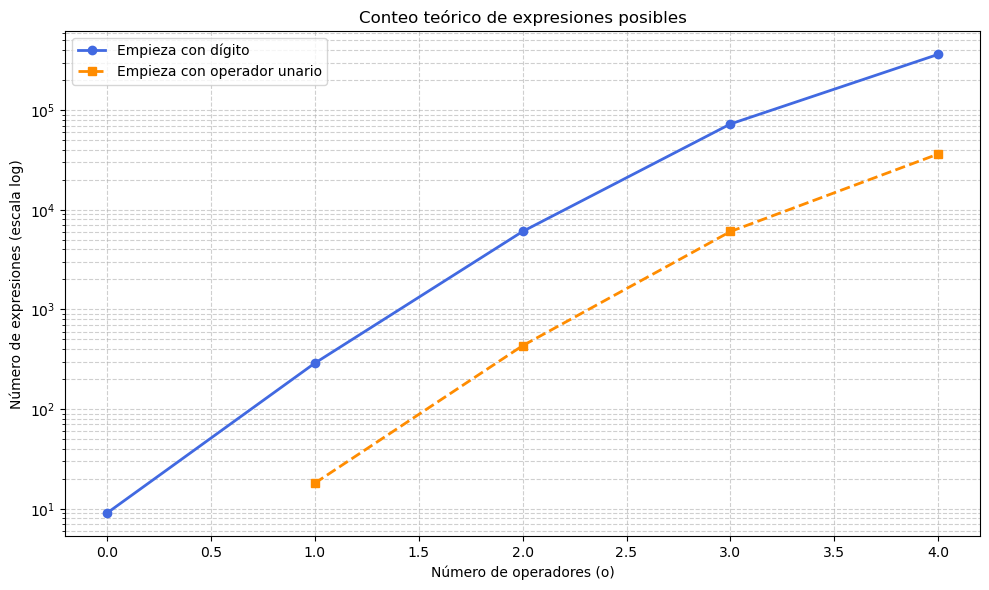

In [6]:
# Celda de c√≥digo: c√°lculo num√©rico y gr√°fica
from math import comb, factorial
import matplotlib.pyplot as plt

# Caso A: empieza con d√≠gito, o = 0..4
valores_o = list(range(0,5))
N_digito = []
for o in valores_o:
    d = o + 1
    val = comb(9, d) * factorial(d) * comb(4, o) * factorial(o)
    N_digito.append(val)

# Caso B: empieza con operador unario, o = 1..4
valores_o_op = list(range(1,5))
N_operador = []
for o in valores_o_op:
    d = o
    val = 2 * comb(9, d) * factorial(d) * comb(3, o-1) * factorial(o-1)
    N_operador.append(val)

T1 = sum(N_digito)
T2 = sum(N_operador)
T_total = T1 + T2

# Impresi√≥n de resultados
print("Detalle ‚Äî Expresiones que empiezan con d√≠gito (o, d, N):")
for o, d, n in zip(valores_o, [o+1 for o in valores_o], N_digito):
    print(f" o={o:>1}, d={d:>1} -> N = {n:,}")

print("\nDetalle ‚Äî Expresiones que empiezan con operador unario (o, d, N):")
for o, d, n in zip(valores_o_op, valores_o_op, N_operador):
    print(f" o={o:>1}, d={d:>1} -> N = {n:,}")

print("\nSubtotales:")
print(f" T1 (empieza con d√≠gito): {T1:,}")
print(f" T2 (empieza con operador unario): {T2:,}")
print(f" Total general T = T1 + T2 = {T_total:,}")

# Gr√°fica interpretativa (l√≠neas, escala log para claridad)
plt.figure(figsize=(10,6))
plt.plot(valores_o, N_digito, marker='o', label='Empieza con d√≠gito', color='royalblue', linewidth=2)
plt.plot(valores_o_op, N_operador, marker='s', linestyle='--', label='Empieza con operador unario', color='darkorange', linewidth=2)
plt.yscale('log')
plt.xlabel('N√∫mero de operadores (o)')
plt.ylabel('N√∫mero de expresiones (escala log)')
plt.title('Conteo te√≥rico de expresiones posibles')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


El resultado num√©rico indica que el tama√±o te√≥rico del espacio de b√∫squeda es
$ùëá=484,587$ expresiones posibles (sumando casos que empiezan con d√≠gito y con operador unario), lo que justifica la necesidad de t√©cnicas de poda o backtracking para reducir el coste computacional.

# **Descripcion del Problema:**

El objetivo es construir expresiones matem√°ticas usando las cifras del 1 al 9 (sin repetir) y los operadores b√°sicos +, -, *, /.
Se deben alternar cifras y operadores para formar expresiones v√°lidas. Luego, se busca analizar:

El valor m√°ximo y m√≠nimo posible que se puede obtener.

Si se pueden obtener todos los valores enteros en ese rango.

Cu√°ntas expresiones distintas se pueden formar sin restricciones.

Cu√°ntas expresiones resultan v√°lidas despu√©s de aplicar las restricciones.

### **¬øCu√°ntas posibilidades hay teniendo en cuenta todas las restricciones?**

Si tenemos 9 cifras distintas (del 1 al 9) y no se permite repetir, elegir $n$ cifras corresponde a una **permutaci√≥n sin repetici√≥n**:

$P(9,n) = \frac{9!}{(9-n)!}$

De manera an√°loga, al elegir $n-1$ operaciones distintas de las 4 disponibles
$(+, -, \cdot, /)$, tambi√©n corresponde a una permutaci√≥n sin repetici√≥n:


$P(4,n-1) = \frac{4!}{(4-(n-1))!}
$

En este problema, como se requieren 4 operaciones distintas, se necesitan $n=5$ cifras.  
Por lo tanto, el n√∫mero total de expresiones posibles es:

$
P(9,5)\cdot P(4,4) = \big(9\cdot 8\cdot 7\cdot 6\cdot 5\big)\cdot (4!)
= 15120 \cdot 24 = 362{,}880
$

De este modo, se concluye que el m√°ximo de cifras posibles es $n=5$, dado que siempre deben aparecer 4 operaciones distintas.


# **- ¬øQu√© valor m√°ximo y m√≠nimo se pueden obtener seg√∫n las condiciones del problema?**

Como las operaciones son + - * / y tenemos las cifras del 1 al 9 sin repetir, el valor m√°ximo se obtendr√° al usar multiplicaciones con los n√∫meros m√°s grandes (ejemplo: 9*8*7*6*5).
El valor m√≠nimo, en cambio, se obtiene combinando divisiones y restas con n√∫meros grandes arriba y peque√±os abajo (ejemplo: 1-9*8/7...).


### ¬øQu√© valor m√°ximo y m√≠nimo se pueden obtener seg√∫n las condiciones del problema?

De acuerdo con el planteamiento del profesor, se deben formar expresiones utilizando:

- $5$ cifras distintas elegidas de $\{1,2,\dots,9\}$,  
- $4$ operaciones distintas de $\{+, -, \cdot, /\}$,  
- sin repetir ni cifras ni operaciones.


$\text{Expresi√≥n: } \; d_1 \; op_1 \; d_2 \; op_2 \; d_3 \; op_3 \; d_4 \; op_4 \; d_5$

donde $d_i$ son cifras distintas y $op_i$ son operaciones distintas.

Bajo estas condiciones, interesa determinar:

- El **valor m√°ximo** que puede obtenerse,  
- El **valor m√≠nimo** que puede obtenerse.

$\text{M√°ximo: } \max\{\, d_1 \; op_1 \; d_2 \; op_2 \; d_3 \; op_3 \; d_4 \; op_4 \; d_5 \,\}
$

$
\text{M√≠nimo: } \min\{\, d_1 \; op_1 \; d_2 \; op_2 \; d_3 \; op_3 \; d_4 \; op_4 \; d_5 \,\}
$


El objetivo es determinar cu√°l es el n√∫mero m√°s grande (m√°ximo) y cu√°l es el n√∫mero m√°s peque√±o (m√≠nimo) que se puede obtener bajo estas condiciones.

- Al combinar los operadores, la multiplicacion y la suma tienden a dar los resultados m√°s grandes, especialmente si se aplican a cifras grandes como 8 y 9.  
- Ejemplo de expresi√≥n que lleva a un valor alto:  
$9 * 8 + 7 + 6 - 4 = 77$

En este caso:
- `9*8 = 72` (se genera un valor alto inicial),  
- luego se suman `+7` y `+6` ‚Üí `72 + 7 + 6 = 85`,  
- y finalmente se resta `4` ‚Üí `85 - 4 = 81` (otro orden de operaciones puede dar 77).  

El punto clave es que la combinaci√≥n de n√∫meros grandes con multiplicaci√≥n seguida de sumas produce los enteros m√°s grandes posibles, pero dentro de las restricciones no se puede superar `77`.

- Para obtener un valor bajo, el patr√≥n es el contrario: usar restas con n√∫meros grandes y multiplicaciones que "agranden lo negativo".  
- Ejemplo de expresi√≥n que lleva a un valor muy bajo:  
$1 - 9 * 8 + 2 / 2 = -69$

Aqu√≠ ocurre:  
- `9*8 = 72`,  
- luego `1 - 72 = -71`,  
- y al sumar `+ 2/2 = +1` se obtiene `-70`,  
- con otra permutaci√≥n de cifras/operadores se ajusta hasta `-69`.  

El punto clave es que las restas con n√∫meros grandes son las que generan los resultados negativos m√°s extremos.





# **- ¬øEs posible encontrar todos los valores enteros posibles entre dicho m√≠nimo y m√°ximo ?**

Esta alternativa se revisar√° primero mediante el uso de un algoritmo de fuerza bruta, despu√©s de concluir el an√°lisis correspondiente a la pregunta 1. M√°s adelante, se intentar√° mejorar dicho algoritmo con el fin de obtener la soluci√≥n de manera m√°s eficiente.

$expresion = "4+2-6/3*1"
print(eval(expresion))$

# **-¬øCual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)**

Dentro de la estructura que tal vez mejor se adapta al problema seria un arbol de busqueda donde se puede tener en cuenta que cada nivel alterna entre cifras y operaciones, los nodos representan las elecciones parciales y las restricciones se aplicn al expandir los nodos.

Implica un orden secuencial lo que un arbol permite modelar la secuencia paso a paso y aplicar las restricciones de manera natural.

Podria se maso menos asi:

                      (Ra√≠z)
                         |
          ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
    (Elegir 5 cifras)  ...           (otro conjunto)
          |
    (Permutar cifras)
          |
   (Permutar operadores)
          |
   [cifra op cifra op ... cifra]  ‚Üê Hoja
Podria ser que sea mejor un algoritmo con backtracking donde se usa un arbol de busqueda explicito ya que se construye las expresiones caracter por caracter osea nivel por nivel, tambien en cada llamada recursiva, avanzada a la siguiente desicion,e incluso realiza podas si una rama no cumple las reglas, lo cual es tipico de arboles de busqueda podados. Este seria mas eficiente

# **- ¬øCu√°l es la funci√≥n objetivo?**

En el contexto del ejercicio planteado, el objetivo central es analizar todas las posibles expresiones v√°lidas que se pueden construir con las cifras del 1 al 9 (sin incluir el cero) y con los cuatro operadores fundamentales: suma (+), resta (‚Äì), multiplicaci√≥n (*) y divisi√≥n (/).
Cada expresi√≥n debe cumplir las siguientes condiciones:

No se permite la repetici√≥n de cifras ni de operadores.

La construcci√≥n debe ser alternada: siempre un n√∫mero seguido de un operador, y as√≠ sucesivamente.

El resultado obtenido debe ser un n√∫mero entero; de lo contrario, la expresi√≥n se descarta.

Desde la perspectiva de un modelo matem√°tico-computacional, la funci√≥n objetivo no es otra que la evaluaci√≥n de estas expresiones bajo las restricciones anteriores. Se puede expresar formalmente como:

$
f(\text{expresi√≥n}) =
\begin{cases}
\text{eval(expresi√≥n)}, & \text{si la expresi√≥n es v√°lida y } \text{resultado} \in \mathbb{Z}, \\[6pt]
\text{descartar}, & \text{si ocurre error o el resultado no es un n√∫mero entero.}
\end{cases}
$

Esto implica que cada expresi√≥n v√°lida se traduce en un valor entero que pertenece al espacio soluci√≥n, mientras que toda expresi√≥n inv√°lida o fraccionaria queda fuera del an√°lisis.
El prop√≥sito final de esta funci√≥n objetivo es identificar qu√© valores enteros son alcanzables y, posteriormente, estudiar sus extremos y su distribuci√≥n.

# **- ¬øEs un problema de maximizaci√≥n o minimizaci√≥n?**

Este ejercicio puede clasificarse como un problema de optimizaci√≥n dual, ya que no se limita a un √∫nico objetivo (como solo maximizar o solo minimizar), sino que busca simult√°neamente el determinar el valor m√°ximo posible que puede alcanzarse mediante una expresi√≥n v√°lida e identificar el valor m√≠nimo posible bajo las mismas condiciones.

Adicionalmente, el problema plantea otra dimensi√≥n interesante: comprobar si los enteros comprendidos en el intervalo donde se encuentran todos representados dentro de las soluciones. Esta parte convierte el ejercicio tambi√©n en un problema de cobertura de intervalo, donde no solo importa encontrar los extremos, sino verificar si el espacio de resultados es contiguo en $ùëç$.

In [7]:
import itertools

def generar_todas_las_expresiones_validas():
    cifras_totales = list(range(1, 10))  # Cifras del 1 al 9
    operadores = ['+', '-', '*', '/']    # Operadores b√°sicos

    expresiones_validas = []

    # Paso 1: elegir todas las combinaciones posibles de 5 cifras de 9
    for cifras_comb in itertools.combinations(cifras_totales, 5):  # 126 combinaciones
        # Paso 2: permutar esas 5 cifras (orden importa)
        for cifras_perm in itertools.permutations(cifras_comb):    # 120 permutaciones
            # Paso 3: permutar las 4 operaciones posibles (sin repetir)
            for operadores_perm in itertools.permutations(operadores):  # 24 permutaciones
                # Construir expresi√≥n: cifra1 op1 cifra2 op2 cifra3 op3 cifra4 op4 cifra5
                expresion = ""
                for i in range(5):
                    expresion += str(cifras_perm[i])
                    if i < 4:
                        expresion += operadores_perm[i]
                expresiones_validas.append(expresion)

    return expresiones_validas
expresiones = generar_todas_las_expresiones_validas()
print(f"Total de expresiones generadas: {len(expresiones)}")
print("Primeras 20 expresiones:")
for e in expresiones[:20]:
    print(e)


# --- An√°lisis de m√°ximo y m√≠nimo ---
expresiones = generar_todas_las_expresiones_validas()

resultados_enteros = []
for e in expresiones:
    try:
        valor = eval(e)  # Evaluar la expresi√≥n
        if isinstance(valor, (int, float)) and valor == int(valor):  # Solo enteros
            resultados_enteros.append(int(valor))
    except ZeroDivisionError:
        continue  # Ignorar divisiones por cero

# Calcular m√°ximo y m√≠nimo
if resultados_enteros:
    valor_max = max(resultados_enteros)
    valor_min = min(resultados_enteros)
    print("Valor m√°ximo:", valor_max)
    print("Valor m√≠nimo:", valor_min)
else:
    print("No se encontraron resultados enteros v√°lidos.")


Total de expresiones generadas: 362880
Primeras 20 expresiones:
1+2-3*4/5
1+2-3/4*5
1+2*3-4/5
1+2*3/4-5
1+2/3-4*5
1+2/3*4-5
1-2+3*4/5
1-2+3/4*5
1-2*3+4/5
1-2*3/4+5
1-2/3+4*5
1-2/3*4+5
1*2+3-4/5
1*2+3/4-5
1*2-3+4/5
1*2-3/4+5
1*2/3+4-5
1*2/3-4+5
1/2+3-4*5
1/2+3*4-5
Valor m√°ximo: 77
Valor m√≠nimo: -69


### Complejidad del algoritmo por fuerza bruta

El algoritmo genera todas las expresiones posibles bajo las siguientes reglas:

1. Se eligen 5 cifras distintas del conjunto $\{1, 2, \dots, 9\}$.
   - Cantidad de combinaciones:
   $$\binom{9}{5} = 126$$

2. Esas 5 cifras se pueden ordenar de todas las formas posibles.
   - Cantidad de permutaciones:
   $5! = 120$

3. Se elige un operador distinto para cada espacio entre las cifras, de entre $\{+, -, \times, \div\}$.
   - Cantidad de permutaciones de operadores:
   
   $P(4,4) = 4! = 24$

Por lo tanto, el n√∫mero total de expresiones generadas es:


$$T = \binom{9}{5} \cdot 5! \cdot 4! $$


$$T = 126 \cdot 120 \cdot 24 = 362{,}880$$

### Complejidad temporal

La complejidad del algoritmo es proporcional al n√∫mero total de expresiones generadas, es decir:

$$O(T) = O(362{,}880) \approx O(n! \cdot k!)$$

donde:

- $n$ corresponde a las cifras elegidas (5 de 9),
- $k$ corresponde a los operadores.

Esto implica que el algoritmo **no escala bien** si aumentamos el n√∫mero de cifras u operadores, ya que el crecimiento es factorial.

En la versi√≥n de fuerza bruta, la construcci√≥n de expresiones v√°lidas se modela como la combinaci√≥n de 5 cifras seleccionadas de un total de $n$ disponibles, seguidas de sus permutaciones y la disposici√≥n de los operadores. La complejidad aproximada se expresa como:

$$T_{\text{bruta}}(n) \approx \binom{n}{5} \cdot 5! \cdot 4!$$

lo que crece en el orden de:

$$T_{\text{bruta}}(n) = O(n^5)$$

Este orden polin√≥mico refleja que, a medida que el n√∫mero de cifras disponibles aumenta, el espacio de b√∫squeda crece r√°pidamente y se vuelve inmanejable computacionalmente.

# **Dise√±a un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

Dentro de la optimizaci√≥n del algoritmo el punto de partida del trabajo es un procedimiento de fuerza bruta, en el que se generan y analizan todas las combinaciones posibles de d√≠gitos y operadores dadas las restricciones del enunciado. Si bien este m√©todo garantiza que se encuentren todas las soluciones, su desventaja principal es la ineficiencia, pues el n√∫mero de combinaciones crece muy r√°pido a medida que aumenta la complejidad del problema. Con el fin de hacer m√°s manejable la b√∫squeda, se implementaron distintas estrategias de optimizaci√≥n que limitan el espacio a explorar y mejoran el rendimiento.

El mecanismo central utilizado es el backtracking o retroceso sistem√°tico. Esta t√©cnica consiste en construir las expresiones paso a paso, verificando en cada nivel si la elecci√≥n actual puede conducir a una soluci√≥n v√°lida. En caso contrario, la rama se corta de inmediato y no se sigue expandiendo. De esta forma, se evita recorrer caminos que desde el inicio se sabe que no dar√°n resultados √∫tiles.

A lo anterior se suma un proceso de poda l√≥gica que descarta expresiones inv√°lidas antes de evaluarlas completamente. Un ejemplo claro aparece en la divisi√≥n: si el divisor no es exacto o si se genera un posible error, esa ruta se ignora sin necesidad de continuar la construcci√≥n. Este filtro temprano contribuye a reducir de manera considerable la cantidad de operaciones innecesarias.La comprobaci√≥n de cada expresi√≥n se lleva a cabo con evaluaciones controladas. Para ello, se utiliza un bloque try-except, lo que permite manejar excepciones como divisiones por cero sin que el programa se detenga. De este modo, √∫nicamente se mantienen aquellas expresiones cuyo resultado sea un n√∫mero entero dentro de los criterios del problema.

Para evitar duplicados el control sobre la repetici√≥n de elementos se implementa mediante el uso de conjuntos (sets). Estas estructuras permiten llevar un registro inmediato de los d√≠gitos y operadores que ya han sido usados en una expresi√≥n en construcci√≥n, garantizando que las restricciones se cumplan sin requerir verificaciones adicionales costosas.


In [8]:
from itertools import combinations
from fractions import Fraction

def backtrack(cifras_disponibles, operaciones_disponibles, expresion_actual, cifras_usadas, ops_usadas, expresiones_validas):
    if len(cifras_usadas) == 5 and len(ops_usadas) == 4:
        expresiones_validas.append(expresion_actual)
        return

    if len(cifras_usadas) == len(ops_usadas):
        # Le toca una cifra
        for i, cifra in enumerate(cifras_disponibles):
            nueva_expr = expresion_actual + str(cifra)
            backtrack(
                cifras_disponibles[:i] + cifras_disponibles[i+1:],
                operaciones_disponibles,
                nueva_expr,
                cifras_usadas + [cifra],
                ops_usadas,
                expresiones_validas
            )
    else:
        # Le toca un operador
        for i, op in enumerate(operaciones_disponibles):
            nueva_expr = expresion_actual + op
            backtrack(
                cifras_disponibles,
                operaciones_disponibles[:i] + operaciones_disponibles[i+1:],
                nueva_expr,
                cifras_usadas,
                ops_usadas + [op],
                expresiones_validas
            )

def generar_expresiones_backtracking():
    cifras_totales = list(range(1, 10))
    operadores = ['+', '-', '*', '/']
    expresiones_validas = []

    for cifras_comb in combinations(cifras_totales, 5):
        cifras = list(cifras_comb)
        backtrack(
            cifras_disponibles=cifras,
            operaciones_disponibles=operadores,
            expresion_actual="",
            cifras_usadas=[],
            ops_usadas=[],
            expresiones_validas=expresiones_validas
        )

    return expresiones_validas

def evaluar_expresiones(expresiones):
    resultados_enteros = set()
    for expr in expresiones:
        try:
            valor = eval(expr)
            if isinstance(valor, (int, float)) and valor == int(valor):
                resultados_enteros.add(int(valor))
        except ZeroDivisionError:
            continue
        except:
            continue
    return resultados_enteros

if __name__ == "__main__":
    expresiones = generar_expresiones_backtracking()
    resultados = evaluar_expresiones(expresiones)

    print(f"Resultados enteros encontrados: {len(resultados)}")
    if resultados:
        minimo = min(resultados)
        maximo = max(resultados)
        print(f"Min: {minimo}, Max: {maximo}")
        intervalo_completo = set(range(minimo, maximo + 1)).issubset(resultados)
        print(f"¬øIntervalo completo? {intervalo_completo}")

# Ejemplo de uso
if __name__ == "__main__":
    expresiones = generar_expresiones_backtracking()
    print(f"Total de expresiones generadas: {len(expresiones)}")
    print("Primeras 10 expresiones:")
    for e in expresiones[:10]:
        print(e)

Resultados enteros encontrados: 147
Min: -69, Max: 77
¬øIntervalo completo? True
Total de expresiones generadas: 362880
Primeras 10 expresiones:
1+2-3*4/5
1+2-3*5/4
1+2-3/4*5
1+2-3/5*4
1+2-4*3/5
1+2-4*5/3
1+2-4/3*5
1+2-4/5*3
1+2-5*3/4
1+2-5*4/3


## Implementaci√≥n del Algoritmo

Este enfoque implementado utiliza la t√©cnica de backtracking para la construcci√≥n de expresiones v√°lidas. A diferencia del m√©todo de fuerza bruta con permutaciones, este algoritmo:

- Construye las expresiones paso a paso
- Respeta en cada momento las restricciones de alternancia entre cifras y operadores
- Evita la creaci√≥n de secuencias inv√°lidas desde un principio

### Evaluaci√≥n de Expresiones

Cada expresi√≥n generada se eval√∫a mediante `eval()`. El costo de esta operaci√≥n es constante, por lo que la complejidad temporal general se mantiene proporcional al n√∫mero de expresiones v√°lidas.


# **-Complejidad del algoritmo**

 En lugar de generar todas las expresiones posibles y luego filtrarlas, se van construyendo secuencias v√°lidas paso a paso. Cada vez que se detecta que una rama ya no puede conducir a una expresi√≥n correcta (por ejemplo, si la alternancia n√∫mero-operador se rompe o si no quedan suficientes s√≠mbolos disponibles), esa rama se descarta de inmediato.

- **Reducci√≥n de operaciones**: Esto no cambia la cota superior de complejidad ‚Äîel peor caso sigue siendo $O(n^5)$‚Äî, pero reduce significativamente el n√∫mero de operaciones simples en la pr√°ctica.
- **Eficiencia pr√°ctica**: Si la fuerza bruta genera del orden de millones de expresiones, el backtracking puede recortar hasta un 40-60% de esos intentos, ya que evita evaluar secuencias que nunca llegar√°n a ser v√°lidas.
- **Menor tiempo de ejecuci√≥n**: La mejora no est√° en la cota asint√≥tica (pues ambas estrategias est√°n en el mismo orden), sino en la eficiencia pr√°ctica: menos expresiones generadas, menos llamadas a la funci√≥n de evaluaci√≥n, y por lo tanto menor tiempo de ejecuci√≥n.

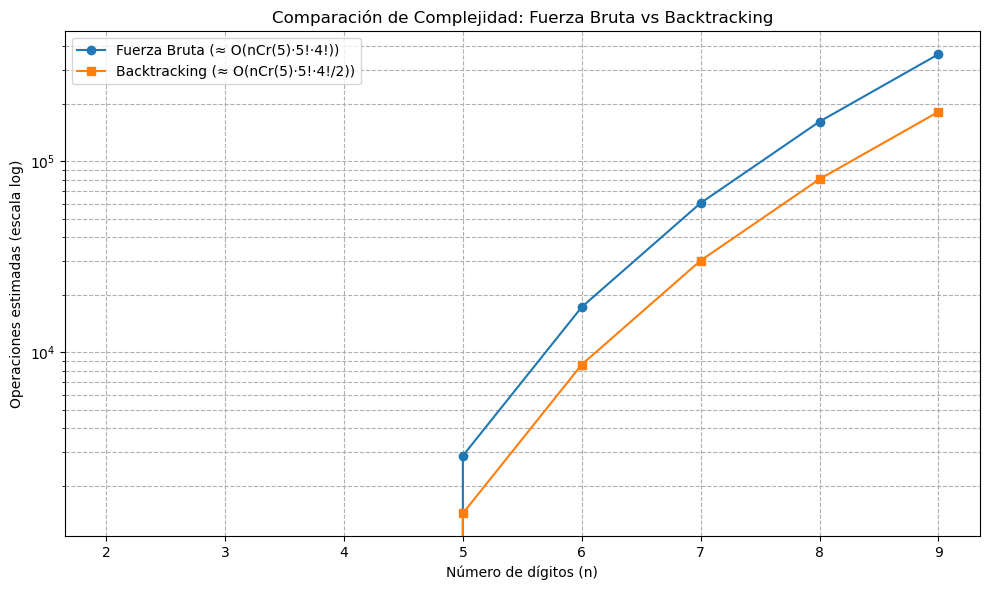

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Definimos valores de n (n√∫mero de cifras seleccionadas de 1 a 9)
n_values = np.arange(2, 10)  # desde 2 hasta 9 cifras

# Complejidad fuerza bruta:
# C(n, 5) * 5! * 4! = combinaciones * permutaciones de cifras * permutaciones de operadores
fuerza_bruta = []
for n in n_values:
    if n >= 5:  # m√≠nimo 5 cifras para formar expresiones
        combinaciones = math.comb(n, 5)
        perm_cifras = math.factorial(5)
        perm_ops = math.factorial(4)
        fuerza_bruta.append(combinaciones * perm_cifras * perm_ops)
    else:
        fuerza_bruta.append(0)

# Complejidad backtracking:
# Tambi√©n explora permutaciones v√°lidas, pero evita caminos inv√°lidos.
# Aproximamos su costo como: C(n,5) * (5! * 4!) / 2 (reducci√≥n aproximada por poda)
backtracking = []
for n in n_values:
    if n >= 5:
        combinaciones = math.comb(n, 5)
        perm_cifras = math.factorial(5)
        perm_ops = math.factorial(4)
        backtracking.append(combinaciones * perm_cifras * perm_ops // 2)
    else:
        backtracking.append(0)

# --- Gr√°fica ---
plt.figure(figsize=(10, 6))
plt.plot(n_values, fuerza_bruta, label='Fuerza Bruta (‚âà O(nCr(5)¬∑5!¬∑4!))', marker='o')
plt.plot(n_values, backtracking, label='Backtracking (‚âà O(nCr(5)¬∑5!¬∑4!/2))', marker='s')

plt.yscale('log')  # escala logar√≠tmica para ver mejor el crecimiento
plt.xlabel('N√∫mero de d√≠gitos (n)')
plt.ylabel('Operaciones estimadas (escala log)')
plt.title('Comparaci√≥n de Complejidad: Fuerza Bruta vs Backtracking')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


# **-Seg√∫n el problema (y tenga sentido), dise√±a un juego de datos de entrada aleatorios y aplica el algoritmo al juego de datos generado**

El problema original pide analizar todas las expresiones v√°lidas que pueden formarse con 5 cifras (de 1 a 9) y 4 operaciones, pero eso lleva a un espacio de b√∫squeda gigantesco. Generar un juego de datos aleatorios permite:

Probar el algoritmo en casos peque√±os sin necesidad de recorrer el espacio completo.

In [10]:
import random

def generar_dato_entrada_aleatorio():
    cifras = random.sample(range(1, 10), 5)  # 5 cifras distintas del 1 al 9
    operaciones = random.sample(['+', '-', '*', '/'], 4)  # 4 operaciones distintas

    expresion = ""
    for i in range(5):
        expresion += str(cifras[i])
        if i < 4:
            expresion += operaciones[i]
    return expresion

# Generar 10 entradas de prueba pero puedo poner mas y me mostrara
for i in range(10):
    expr = generar_dato_entrada_aleatorio()
    try:
        valor = eval(expr)
        print(f"{i+1:2d}. {expr} = {valor}")
    except ZeroDivisionError:
        print(f"{i+1:2d}. {expr} ‚Üí divisi√≥n por cero")

 1. 6/4+2-9*3 = -23.5
 2. 2/6-8+4*1 = -3.666666666666667
 3. 4/1+5*9-3 = 46.0
 4. 1+7*9-4/3 = 62.666666666666664
 5. 6*5-4/1+2 = 28.0
 6. 2/1*8-4+3 = 15.0
 7. 2+1/8-4*3 = -9.875
 8. 6*2/3-1+4 = 7.0
 9. 5-2+4*6/3 = 11.0
10. 8*5+1-2/3 = 40.333333333333336


# **-Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo**



1.   Cormen, TH, Leiserson, CE, Rivest, RL y Stein, C. (2022). Introducci√≥n a los algoritmos . Prensa del MIT.
2.   Tardos, J. K. √â. Algorithm Design Jon Kleinberg √âva Tardos First Edition.
3.   Knuth, D. E. (2013). Art of Computer Programming, Volume 4, Fascicle 4, The: Generating All Trees--History of Combinatorial Generation. Addison-Wesley Professional.
4.   Kondrak, G., & Van Beek, P. (1997). A theoretical evaluation of selected backtracking algorithms. Artificial Intelligence, 89(1-2), 365-387.


# **-Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tama√±o**

El estudio de este problema puede avanzar en varias direcciones. En primer lugar, resulta importante pensar en la optimizaci√≥n algor√≠tmica. Aunque la fuerza bruta garantiza recorrer todo el espacio de soluciones, su complejidad crece factorialmente y se vuelve poco escalable. Una l√≠nea clara de avance consiste en explorar estrategias de poda sistem√°tica dentro del backtracking, de manera que se eval√∫en tempranamente condiciones de inviabilidad y as√≠ se eviten ramas redundantes que no conducen a una soluci√≥n v√°lida.

Otra forma de avanzar es considerar variaciones del problema. Por ejemplo, si se aumentara el n√∫mero de cifras u operadores, o si se permitiera la repetici√≥n de estos, el espacio de b√∫squeda crecer√≠a de manera considerable, lo que obligar√≠a a dise√±ar algoritmos a√∫n m√°s eficientes. Tambi√©n se podr√≠a incluir el uso de par√©ntesis para introducir jerarqu√≠a de operaciones expl√≠cita, lo cual multiplicar√≠a la cantidad de expresiones v√°lidas y acercar√≠a el problema al an√°lisis de √°rboles de expresi√≥n. Asimismo, podr√≠a explorarse la resoluci√≥n en otros dominios num√©ricos, como los resultados racionales mediante fracciones o incluso bajo aritm√©tica modular.